In [2]:
#importing the libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from collections import Counter 

#Turnoff the warnings on Python
import warnings 
warnings.filterwarnings("ignore")

In [3]:
#importing the data
veri = pd.read_csv("olympics.csv")
veri.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
veri.columns


Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [7]:
#changing the column names to Turkish
veri.rename(columns={'ID' : 'id',
                    'Name' : 'isim',
                    'Gender' : 'cinsiyet',
                    'Age' : 'yas',
                    'Height' : 'boy',
                    'Weight' : 'kilo',
                    'Team' : 'takim',
                    'NOC' : 'uok',
                    'Games' : 'oyunlar',
                    'Year' : 'yil',
                    'Season' : 'sezon',
                    'City' : 'sehir',
                    'Sport' : 'spor',
                    'Event' : 'etkinlik',
                    'Medal' : 'madalya'}, inplace = True)
veri.head(2)

,id,isim,cinsiyet,yas,boy,kilo,takim,uok,oyunlar,yil,sezon,sehir,spor,etkinlik,madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [8]:
#removing the id and oyunlar columns using drop function 
veri = veri.drop(["id","oyunlar"], axis = 1) #axis = 1 means column
veri.head(2)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [11]:
#printing the unique events count
essiz_etkinlik = pd.unique(veri.etkinlik)
print("Eşsiz etkinlik sayısı: {}" .format(len(essiz_etkinlik)))
essiz_etkinlik[:10]

Eşsiz etkinlik sayısı: 765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [13]:
#iteratively traverse each event 
#calculate height and weight averages for the event
#equalize the missing height and weight values of the events with the average height and weight values for the event. 
veri_gecici = veri.copy() #creating a copy of the data to avoid corrupting the real data
boy_kilo_liste = ["boy", "kilo"]
for e in essiz_etkinlik: #traverse the list 
    #creating the event filter
    etkinlik_filtre = veri_gecici.etkinlik == e 
    #filtering the data by event
    veri_filtreli = veri_gecici[etkinlik_filtre]

    #calculate the average values of height and weight for the event
    for s in boy_kilo_liste:
        ortalama = np.round(np.mean(veri_filtreli[s]),2)
        if  ~np.isnan(ortalama): #if there is an average value for event. isnan = is not  a number.  ~ = not 
            veri_filtreli[s] = veri_filtreli[s].fillna(ortalama) #fill the missing values with the average value
        else: #if there isn't an average value for the event
            tum_veri_ortalamasi = np.round(np.mean(veri[s]),2) #calculate the average value for all of the data 
            veri_filtreli[s] = veri_filtreli[s].fillna(tum_veri_ortalamasi) #fill the values with the average value for all data
#Equalize the temporary data (veri_gecici) with the data where missing values have been filled in, for the event.
    veri_gecici[etkinlik_filtre] = veri_filtreli
#Equalize the temporary data, where missing values have been filled, with the real data.
veri = veri_gecici.copy()
veri.info() #check the missing value counts in height and weight columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       261642 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [14]:
#find the empty values for age 
yas_ortalamasi = np.round(np.mean(veri.yas),2)
print("Yaş Ortalaması: {}".format(yas_ortalamasi))
veri["yas"] = veri["yas"].fillna(yas_ortalamasi)
veri.info()

Yaş Ortalaması: 25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       271116 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [15]:
#numbers of the athletes without medals
madalya_degiskeni = veri["madalya"]
pd.isnull(madalya_degiskeni).sum()

231333

In [16]:
madalya_degiskeni_filtresi = ~pd.isnull(madalya_degiskeni) #atheletes with medals

In [17]:
veri = veri[madalya_degiskeni_filtresi]
veri.head(5) #now it is only the data of athletes with medal

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [18]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      39783 non-null  object 
 1   cinsiyet  39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [19]:
#save the data to use it later
veri.to_csv("olympics_clean.csv", index = False)

There are 4 numerical variables inside the data :
age, height, weight, year
to view and interpret the numerical variables ı will use data frequency and basic statistics knowledge
ı will examine data frequency informations using histogram chart
to interpret basic statistics informations, ı will use box plot

In [21]:
#function for drawing histogram charts
def plotHistogram(degisken):
    """
    Input : varible/column name
    Output: histogram of the variable 
    """
    plt.figure()
    plt.hist(veri[degisken], bins = 85, color = "orange")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()

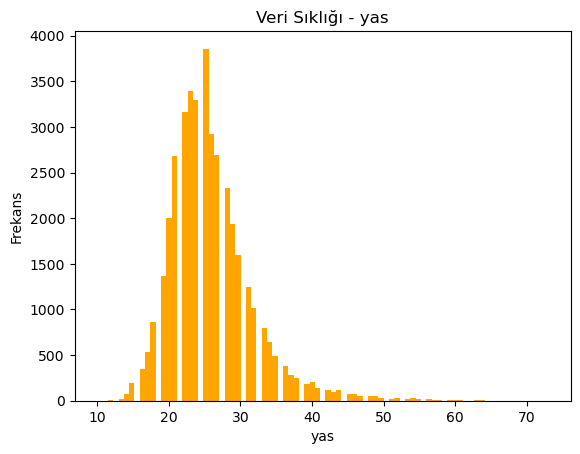

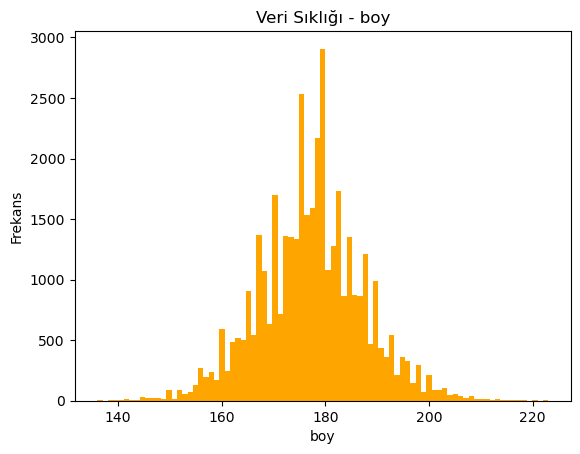

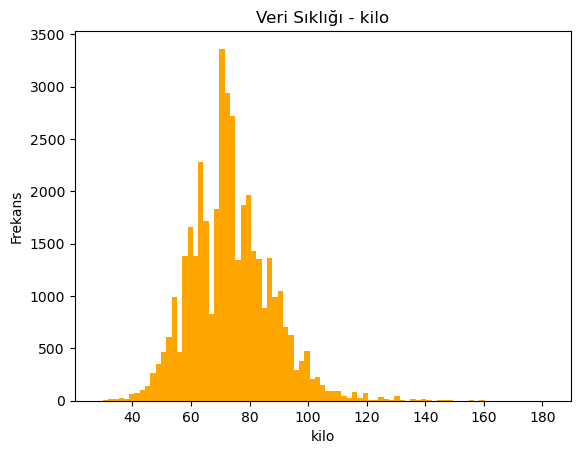

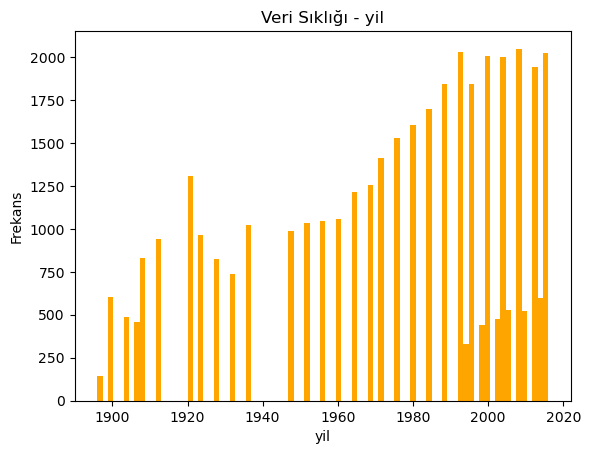

In [23]:
#draw the histograms for all of the numerical variables
sayısal_degisken = ["yas", "boy", "kilo", "yil"]
for i in sayısal_degisken:
    plotHistogram(i)

As expected on the age, weight and height columns there is a distribution close to normal distribution
The first noticable thing on the year column is , there were not any olympics in the world war 1 and 2. 
And there were more olympic games in the last 20 years
Also the number of medals given in summer olympics were higher compared to winter olympics

In [24]:
veri.describe()

,yas,boy,kilo,yil
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.918456,177.336690,73.738320,1973.943845
std,5.859569,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


Statistical attributes of the numerical data
count: örnek sayısı
mean: ortalama
std: standart sapma
min: minimum değer
25%: birinci çeyrek
50%: medyan
75%: üçüncü çeyrek
max: maximum değer